<a href="https://colab.research.google.com/github/grommy/CNN_in_TensorFlow/blob/master/week_4/Sign_language_TransferLearning_from_1_dimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import cv2

import matplotlib.pyplot as plt

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [4]:
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/CNN_in_TF/Week4/sign-language-mnist

american_sign_language.PNG  amer_sign3.png	 sign_mnist_train.csv
amer_sign2.png		    sign_mnist_test.csv


In [0]:
!cp '/content/gdrive/My Drive/Colab Notebooks/CNN_in_TF/Week4/sign-language-mnist/sign_mnist_train.csv' .
!cp '/content/gdrive/My Drive/Colab Notebooks/CNN_in_TF/Week4/sign-language-mnist/sign_mnist_test.csv' .

In [6]:
import pandas as pd
X_train = pd.read_csv('sign_mnist_train.csv', nrows=100)
X_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [7]:
! ls

gdrive	sample_data  sign_mnist_test.csv  sign_mnist_train.csv


In [8]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    images_list = []
    labels_list = []    
    with open(filename) as training_file:
      training_file.readline()
      print("working with %s" % filename)
      # Your code starts here
      for _, line in enumerate(training_file):
        row = [int(i) for i in line.split(',')]
        labels_list.append(row[0])
        images_list.append(row[1:785])
        
      images = np.reshape(images_list, (-1,28,28))
      labels = np.array(labels_list)
      
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

working with sign_mnist_train.csv
working with sign_mnist_test.csv
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [0]:
training_images_retyped = training_images.astype('uint8')


In [0]:
IMG_SIZE = 32
img_resized = cv2.resize(training_images_retyped[0], (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_LINEAR)

In [0]:
import imageio
imageio.imwrite('first_image.jpg', img_resized)

In [12]:
!ls

first_image.jpg  gdrive  sample_data  sign_mnist_test.csv  sign_mnist_train.csv


In [13]:
img_gray = np.expand_dims(training_images[0], 2)
img_gray.shape

(28, 28, 1)

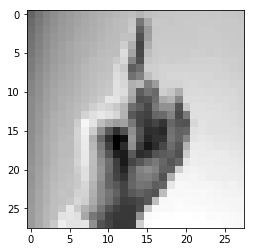

In [14]:
plt.imshow(training_images[0], cmap='gray');

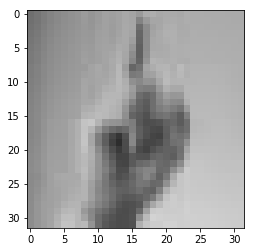

In [15]:
image = cv2.imread('first_image.jpg')
plt.imshow(image);

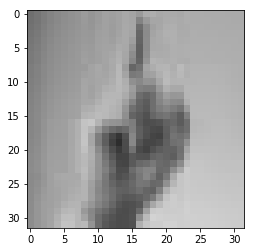

In [16]:
image_clr = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_clr);

In [17]:
print(training_images[0].shape)
print(image.shape)
print(image_clr.shape)

(28, 28)
(32, 32, 3)
(32, 32, 3)


(5, 75, 75)


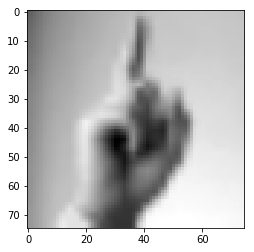

In [58]:
def gray_img_reshape(image_arr_2d, target_size):
  # large image is shape (1, 128, 128)
  # small image is shape (1, 64, 64)
  new_arr = []
  image_arr = image_arr_2d.astype('float32')
  for img in image_arr:
    new_image = cv2.resize(img, (target_size,target_size))
    new_arr.append(new_image)

  return np.array(new_arr)

sm = gray_img_reshape(training_images[:5], target_size=75)
print(sm.shape)
plt.imshow(sm[0], cmap='gray');

In [0]:
IMG_SIZE = 75

training_images_resized = gray_img_reshape(training_images, target_size=IMG_SIZE)
testing_images_resized = gray_img_reshape(testing_images, target_size=IMG_SIZE)

In [95]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images_ex = np.expand_dims(training_images_resized, axis=3)
testing_images_ex = np.expand_dims(testing_images_resized, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)
    
# Keep These
print(training_images_ex.shape)
print(testing_images_ex.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 75, 75, 1)
(7172, 75, 75, 1)


In [101]:
NUM_CLASSES = len(np.unique(training_labels)) + 1
print(NUM_CLASSES)

training_labels_cat = tf.keras.utils.to_categorical(training_labels, dtype='int')
testing_labels_cat = tf.keras.utils.to_categorical(testing_labels, dtype='int')
print(training_labels_cat[0])
print(testing_labels_cat[0])
print(training_labels_cat.shape)

25
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(27455, 25)


In [0]:
BS = 64
train_data_bw_iterator = train_datagen.flow(training_images_ex, training_labels_cat, batch_size=BS)
validation_data_bw_iterator = validation_datagen.flow(testing_images_ex, testing_labels_cat, batch_size=BS)

## Use Transfer Learning

https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751 <br>
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [0]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#     -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [0]:
pre_trained_model = InceptionV3(input_shape = (75, 75, 3), 
                                include_top = False, 
                                weights = "imagenet")
# local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
# pre_trained_model.load_weights("imagenet")

In [0]:
# from tensorflow.keras.applications import ResNet50
# pre_trained_model = ResNet50(input_shape = (28, 28, 1), 
#                                 include_top = False, 
#                                 weights = None)

In [70]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 37, 37, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 37, 37, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 37, 37, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

## TO RGB on the Fly

https://www.kaggle.com/c/tgs-salt-identification-challenge/discussion/63710 <br>
https://forums.fast.ai/t/black-and-white-images-on-vgg16/2479/12 <br>





```
img_input = Input(shape=(img_size_target,img_size_target,1))
img_conc = Concatenate()([img_input, img_input, img_input])    

model = Unet(backbone_name='resnet34', input_tensor=img_conc, encoder_weights='imagenet', freeze_encoder=True)
```




In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, \
  GlobalAveragePooling2D, Conv2D, MaxPooling2D, Input, Concatenate
from tensorflow.keras.models import Sequential


def build_tl_model(original_model, num_classes, num_layer_to_drop=0, save_file=None):
  """
  Perform 'surgery' on a pretrained model. Then add layers to create a new model
  that has just one final, trainable layer with softmax activation for 
  multi-class output.
  """
  img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 1, ))
  img_conc = Concatenate(axis=-1)([img_input, img_input, img_input])
  input_model = Model(inputs=img_input, outputs=img_conc, name="input_model")
  
  # ______________________________________________________________________________
  # Extract needed info from pre-trained model.
  bottleneck_input  = original_model.get_layer(index=0).input
  bottleneck_output = original_model.get_layer('mixed5').output
  bottleneck_model = Model(inputs=bottleneck_input, outputs=bottleneck_output,
                          name="bottleneck")

  # ______________________________________________________________________________
  # Freeze these layers so we are not retraining the full model. 
  for layer in bottleneck_model.layers:
    layer.trainable = False

  # ______________________________________________________________________________
  # Build new transfer learning model.
  new_model = Sequential()
  new_model.add(input_model)
  new_model.add(bottleneck_model)
#   new_model.add(Conv2D(36, kernel_size=(3,3), activation='relu'))
  new_model.add(GlobalAveragePooling2D())
  new_model.add(Dense(128, activation="relu"))
  new_model.add(Dense(num_classes, activation="softmax"))

#   NUM_CLASSES = len(os.listdir(IMG_DIR))  # How many image classes are in our new data?
  BOTTLENECK_DIM = bottleneck_output.shape.dims[1]  # The number of nodes in the second to last layer of the pre-trained model.
  print(BOTTLENECK_DIM)                    

  if save_file:
    new_model.save(save_file)

  return new_model

In [120]:
transfer_model = build_tl_model(pre_trained_model, num_classes=NUM_CLASSES)
transfer_model.summary()

3
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_model (Model)          (None, 75, 75, 3)         0         
_________________________________________________________________
bottleneck (Model)           (None, 3, 3, 768)         5138656   
_________________________________________________________________
global_average_pooling2d_6 ( (None, 768)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               98432     
_________________________________________________________________
dense_13 (Dense)             (None, 25)                3225      
Total params: 5,240,313
Trainable params: 101,657
Non-trainable params: 5,138,656
_________________________________________________________________


In [0]:
# Compile Model. 
from tensorflow.keras.optimizers import RMSprop
transfer_model.compile(optimizer=RMSprop(lr=1e-2), loss='categorical_crossentropy', metrics=['acc'])

In [0]:
# # Compile Model. 
# from tensorflow.keras.optimizers import Adam
# transfer_model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['acc'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

transfer_checkpoint = ModelCheckpoint(filepath='transfer_model_1dim.h5',
                             monitor='val_acc', 
                             save_best_only=True, 
                             load_weights_on_restart=True,
                            )
transfer_earlystopping = EarlyStopping(monitor='val_acc',
                             patience=2)

In [0]:
BS = 64
train_data_bw_iterator = train_datagen.flow(training_images_ex, training_labels_cat, batch_size=BS)
validation_data_bw_iterator = validation_datagen.flow(testing_images_ex, testing_labels_cat, batch_size=BS)

In [125]:
# Train the Model
EPOCHS = 20

transfer_history = transfer_model.fit_generator(
     train_data_bw_iterator,
	   validation_data=validation_data_bw_iterator,
	   steps_per_epoch=len(training_images) // BS,
     epochs=EPOCHS,
     callbacks=[transfer_checkpoint, transfer_earlystopping]
)

Epoch 1/20
428/428 [==============================] - 301s 703ms/step - loss: 1.2914 - acc: 0.5853 - val_loss: 3.8471 - val_acc: 0.2974
Epoch 2/20
428/428 [==============================] - 293s 684ms/step - loss: 0.7179 - acc: 0.7571 - val_loss: 3.3151 - val_acc: 0.3961
Epoch 3/20
428/428 [==============================] - 296s 691ms/step - loss: 0.6369 - acc: 0.7888 - val_loss: 4.5461 - val_acc: 0.3652
Epoch 4/20
428/428 [==============================] - 295s 688ms/step - loss: 0.5893 - acc: 0.8057 - val_loss: 7.2947 - val_acc: 0.2734
